# Logistic Regression

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    
Logistic regression, despite its name, is a linear model for classification rather than regression. 

Logistic regression is also known in the literature as ***logit regression***, 
***maximum-entropy classification (MaxEnt)***, or ***log-linear classifier***. 

In this model, the probabilities describing the possible outcomes of a single trial 
are modeled using a logistic function.

Logistic regression is implemented in LogisticRegression. 

This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional 
$\ell_1$, $\ell_2$, or Elastic-Net regularization.

# Note:
    
Regularization is applied by default, which is common in machine learning but not in statistics.

Another advantage of regularization is that it improves numerical stability. 

No regularization amounts to setting C to a very high value.

# l2-Norm Regularization

As an optimization problem, binary class $\ell_2$ 
penalized logistic regression minimizes the following cost function:
    
$$ \min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$$.    

# L1-Norm Regularization

Similarly, $\ell_1$ regularized logistic regression solves the following optimization problem:
    
$$ \min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$$.

# Elastic-Net Regularization

Elastic-Net regularization is a combination of $\ell_1$ and $\ell_2$, 
and minimizes the following cost function:

$$\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$$,

where $\rho$ controls the strength of $\ell_1$ regularization 
vs. $\ell_2$ regularization (it corresponds to the l1_ratio parameter).

The solvers implemented in the class LogisticRegression are “liblinear”, “newton-cg”, “lbfgs”, 
“sag” and “saga”:

The solver “liblinear” uses a coordinate descent (CD) algorithm, and relies on the excellent 
C++ LIBLINEAR library, which is shipped with scikit-learn. 

However, the CD algorithm implemented in liblinear cannot learn a true multinomial (multiclass) model; 
instead, the optimization problem is decomposed in a “one-vs-rest” fashion so separate 
binary classifiers are trained for all classes. 

This happens under the hood, so LogisticRegression instances using this solver behave as multiclass classifiers. 

For $\ell_1$ regularization sklearn.svm.l1_min_c allows to calculate the lower bound 
for C in order to get a non “null” (all feature weights to zero) model.

The “lbfgs”, “sag” and “newton-cg” solvers only support regularization or no regularization, 
and are found to converge faster for some high-dimensional data. 

Setting multi_class to “multinomial” with these solvers learns a true multinomial 
logistic regression model 5, which means that its probability estimates should be better 
calibrated than the default “one-vs-rest” setting.

The “sag” solver uses Stochastic Average Gradient descent 6. 

It is faster than other solvers for large datasets, when both the number of samples and 
the number of features are large.

The “saga” solver 7 is a variant of “sag” that also supports the non-smooth penalty="l1". 

This is therefore the solver of choice for sparse multinomial logistic regression. 

It is also the only solver that supports penalty="elasticnet".

The “lbfgs” is an optimization algorithm that approximates the Broyden–Fletcher–Goldfarb–Shanno 
algorithm 8, which belongs to quasi-Newton methods. 

The “lbfgs” solver is recommended for use for small data-sets but for larger datasets its 
performance suffers. 

The following table summarizes the penalties supported by each solver:
    
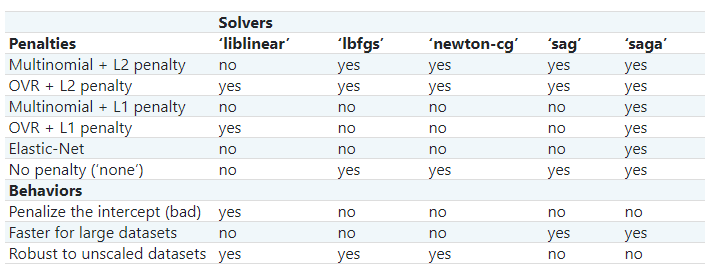

The “lbfgs” solver is used by default for its robustness. For large datasets the “saga” solver is usually faster. 

For large dataset, you may also consider using SGDClassifier with ‘log’ loss, which might be even faster but requires more tuning.